# Analisi con NLTK

In [144]:
!pip install spacy
#python -m spacy download en_core_web_sm

In [145]:
!pip install yellowbrick

In [146]:
!pip install natsort

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import nltk
import string
import re
import sklearn

from nltk import *
from nltk import punkt
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag_sents
from nltk import pos_tag_sents
from sklearn.feature_extraction.text import CountVectorizer

#import wordcloud
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
plt.rcParams['figure.figsize'] = [10, 8]

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [95]:
df = pd.read_csv('dati/df_finale_2020_2021.csv')
del df['Unnamed: 0'] #rimuovo la prima colonna

In [96]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,[],[],0,0
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azioni riprovevoli potrebbe compiere governo tracciando...,[],1,0,0,[],[],0,0
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,[],1,0,4,[],[],0,0
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto privacy tralasciando fatto immuni molto sicura tante a...,[],0,0,1,[],"[{'screen_name': 'DiegoFusaro', 'name': 'Diego Fusaro', 'id': '951246650'}]",0,1
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,['appimmuni'],[],1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo obbligatorio uso immuniapp mezzi pubblici chiunque ...,"[{'screen_name': 'immuni_app', 'name': 'immuni app', 'id': '1283675098092797955'}]",0,0,0,"['immuniapp', 'contattostretto', 'positivo']","[{'screen_name': 'GiorgiaMeloni', 'name': 'Giorgia Meloni 🇮🇹 ن', 'id': '130537001'}, {'screen_na...",3,3
9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screen ...,[],0,0,0,"['greenpass', 'zoneacolori', 'restrizioni', 'lockdown', 'testmolecolari', 'testrapidi', 'traccia...",[],15,0
9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusivamente immuniapp vogliamo mettere,[],1,0,0,"['cashback', 'greenpassobbligatorio', 'immuniapp']",[],3,0
9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave son vaccinato breve seconda dose ritengo grosse b...,[],3,0,3,[],"[{'screen_name': 'Dino53084186', 'name': 'Dino', 'id': '1245800767933513729'}, {'screen_name': '...",0,2


In [97]:
print("Numero TWEETS dataset:", len(df['tweet'].value_counts()))

Numero TWEETS dataset: 9510




## PREPROCESSING  TWEET:
1. Rimuovere punteggiatura
2. Tokenizzazione
3. POS Tag
4. Rimuovere le stopwords (es. articoli, le congiunzioni, le preposizioni, ecc)
5. Lemmatizzazione/stemming ->  riduzione delle parole inflesse (o talvolta derivate) alla loro forma di base o radice, generalmente una forma scritta.

In [98]:
stopword = nltk.corpus.stopwords.words('italian')
print(stopword)

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

In [185]:
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols
stopword = nltk.corpus.stopwords.words('italian')
# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
   # tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('@', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#)', ' ', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    tweet = re.sub(' amp ', '&', tweet)
    tweet = re.sub('una', 'uno', tweet)
    tweet = re.sub('che', 'perché', tweet)
    #tweet = nostppw(tweet)
    return tweet

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    tweet = remove_users(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub(' & ', '', tweet)
    
    return tweet

#def nostppw(clean_col):
 #   df[clean_col] = df[clean_col].apply(lambda x: ' '.join(st.stem(text) for text in x.split() if text not in stop_words))
    
def tokenize_tweets(df):
    df['tokens'] = df.tweet.apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [100]:
df['token'] = df["tweet"].astype(str).apply(word_tokenize)

Tokenizzo

In [101]:
#df['docu'] = [tokenize_tweets(tweet) for tweet in df.tweet]
df['n_tok'] = [len(token) for token in df.token]
#df['tok'] = [token for token in df.token]

In [102]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count,token,n_tok
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,[],[],0,0,"[immuni, app, contenere, contagi, covid, fase, vers]",7
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azioni riprovevoli potrebbe compiere governo tracciando...,[],1,0,0,[],[],0,0,"[valà, piergianfranco, lotta, privacy, chissà, azioni, riprovevoli, potrebbe, compiere, governo,...",14
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,[],1,0,4,[],[],0,0,"[scaricate, app, immuni, serve, governo, tracciarci, controllarci, sveglia, gente, abbasso, ditt...",11
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto privacy tralasciando fatto immuni molto sicura tante a...,[],0,0,1,[],"[{'screen_name': 'DiegoFusaro', 'name': 'Diego Fusaro', 'id': '951246650'}]",0,1,"[diegofusaro, scusa, attimo, tieni, così, tanto, privacy, tralasciando, fatto, immuni, molto, si...",19
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,['appimmuni'],[],1,0,"[qualcuno, adotti, bambino, appimmu]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo obbligatorio uso immuniapp mezzi pubblici chiunque ...,"[{'screen_name': 'immuni_app', 'name': 'immuni app', 'id': '1283675098092797955'}]",0,0,0,"['immuniapp', 'contattostretto', 'positivo']","[{'screen_name': 'GiorgiaMeloni', 'name': 'Giorgia Meloni 🇮🇹 ن', 'id': '130537001'}, {'screen_na...",3,3,"[giorgiameloni, belpietrotweet, giusto, rendiamo, obbligatorio, uso, immuniapp, mezzi, pubblici,...",22
9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screen ...,[],0,0,0,"['greenpass', 'zoneacolori', 'restrizioni', 'lockdown', 'testmolecolari', 'testrapidi', 'traccia...",[],15,0,"[update, greenpass, zoneacolori, restrizioni, lockdown, testmolecolari, testrapidi, tracciamento...",25
9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusivamente immuniapp vogliamo mettere,[],1,0,0,"['cashback', 'greenpassobbligatorio', 'immuniapp']",[],3,0,"[bel, cashback, ogni, esibizione, scaricato, esclusivamente, immuniapp, vogliamo, mettere]",9
9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave son vaccinato breve seconda dose ritengo grosse b...,[],3,0,3,[],"[{'screen_name': 'Dino53084186', 'name': 'Dino', 'id': '1245800767933513729'}, {'screen_name': '...",0,2,"[dino, sbonaccini, vede, differenza, problema, grave, son, vaccinato, breve, seconda, dose, rite...",16


In [91]:
def rimuovi_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['token'] = df['token'].apply(lambda x: rimuovi_stopwords(x))
df.head(10)

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,hashtag_count,ment_count,token,n_tok,token_lunghezza_media
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi del covid nella fase vers,[],0,0,0,[],[],0,0,"[immuni, app, contenere, contagi, covid, fase, vers]",9,8.222222
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta tua privacy chissà che azioni riprovevoli potrebbe compiere governo co...,[],1,0,0,[],[],0,0,"[valà, piergianfranco, lotta, privacy, chissà, azioni, riprovevoli, potrebbe, compiere, governo,...",17,10.058824
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,non scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,[],1,0,4,[],[],0,0,"[scaricate, app, immuni, serve, governo, tracciarci, controllarci, sveglia, gente, abbasso, ditt...",12,10.000000
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto alla tua privacy tralasciando fatto che immuni sia mol...,[],0,0,1,[],"[{'screen_name': 'DiegoFusaro', 'name': 'Diego Fusaro', 'id': '951246650'}]",0,1,"[diegofusaro, scusa, attimo, tieni, così, tanto, privacy, tralasciando, fatto, immuni, molto, si...",27,8.222222
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino dell appimmu,[],0,0,2,['appimmuni'],[],1,0,"[qualcuno, adotti, bambino, appimmu]",5,9.600000
5,2020-06-04,141278724,rico6868,𝘼𝙡 𝙂𝙤𝙧𝙞𝙩𝙢𝙤,finchè non faranno tampone sierologico non scaricherò app immuni perchè app senza controlli temp...,[],0,0,0,['immuni'],[],1,0,"[finchè, tampone, sierologico, scaricherò, app, immuni, perchè, app, senza, controlli, tempestiv...",22,8.909091
6,2020-06-04,475234937,valy_s,Valeria S.,bene fortunatamente abbiamo risolto problema principale dell app immuni vignette sono state corr...,[],6,4,11,['immuni'],[],1,0,"[bene, fortunatamente, risolto, problema, principale, app, immuni, vignette, state, corrette, fe...",30,9.966667
7,2020-06-04,16994466,gigibeltrame,Gigi Beltrame,come funziona app immuni digilosofia,[],0,0,0,['digilosofia'],[],1,0,"[funziona, app, immuni, digilosofia]",5,9.600000
8,2020-06-04,565053234,rafeyoc,rafeyoc,basta ste cagate app immuni cambia immagine contestata ora figlio braccio papà mentre mamma lavora,[],0,0,0,[],[],0,0,"[basta, ste, cagate, app, immuni, cambia, immagine, contestata, ora, figlio, braccio, papà, ment...",15,8.666667
9,2020-06-04,27007409,parliamodinews,Parliamo di…,coronavirus possibile scaricare app immuni tracciare covid mila download ore,[],0,0,0,[],[],0,0,"[coronavirus, possibile, scaricare, app, immuni, tracciare, covid, mila, download, ore]",10,9.800000


rimuovo token doppioni

In [103]:
df.sort_values(by='token', ascending=True)[['token', 'date', 'name', 'hashtags', 'n_tok']].head(n=10)

,token,date,name,hashtags,n_tok
7641,"[aaa, cercarsi, qualcuno, app, immuni, info, molto, importanti, covid, appimmuni, coronavirus, i...",2020-08-02,Run Man ♻️,"['covid_19', 'appimmuni', 'coronavirus', 'immuni']",12
2996,"[abbastanza, convinto, app, boom, download, mentre, immuni, male, assoluto, incredibile, pagliar...",2020-11-11,Alle Stevanin ,"['app', 'immuni', 'covid_19']",14
4475,"[abbraccio, app, immuni, ovunque, marzo]",2021-03-16,Mauro Bortone,['16marzo'],5
7666,"[abecks, appimmuni, boh]",2020-08-14,Lia,['appimmuni'],3
6133,"[abecks, dossicarla, cartaceo, tramite, app, immu]",2021-08-05,Gianlorenzo M.🇮🇹🇪🇺,[],6
8490,"[abitanti, regioni, test, aderito, sperimentazione, volontaria, immuni, fate, obbligatoria, oppu...",2020-06-08,Paolo Capurro,"['immuniapp', 'iosonoglieventi', 'fis', 'italialive']",22
8797,"[abitate, fogne, fascia, meloni, lasciate, perdere, scaricate, neanche, rubate, lega, immuniapp,...",2020-06-25,tonitho ☮,"['meloni', 'lega', 'immuniapp', '49milioni']",15
920,"[abocconetti, breveinutile, immuni, esattamente, app, tante, altre]",2020-07-12,Diego Maninetti,[],7
2322,"[aborruso, simonecosimi, dontyna, giuragu, palazzo, chigi, immuni, app, rep, salute, internazion...",2020-10-06,Enrico Ferraris,[],29
8089,"[abruzzo, corretto, funzionamento, app, immuni, dipende, organizzazione, assessorato, sanità, re...",2020-10-29,MarsicaWeb,"['abruzzo', 'appimmuni', 'francescotaglieri', 'giuntaregionale', 'prevenzionecovid', 'tracci']",19


In [104]:
df['n_tok'].sum()

146921

Media dei tokens

In [105]:
df['n_tok'].mean()

15.016455437448895

Quantità Tokens utilizzati nei tweet

In [106]:
print('quantità  massima token utilizzati nei tweet', df['n_tok'].max())
print('quantità minima token utilizzati nei tweet', df['n_tok'].min())

quantità  massima token utilizzati nei tweet 78
quantità minima token utilizzati nei tweet 2


In [107]:
df['token_lunghezza_media'] = df['token'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [108]:
#df['token_lunghezza'] = df['tokens'].apply(lambda x: [len(w) for w in str(x).split()])

In [109]:
df['token_lunghezza_media'].mean()

10.02132123243413

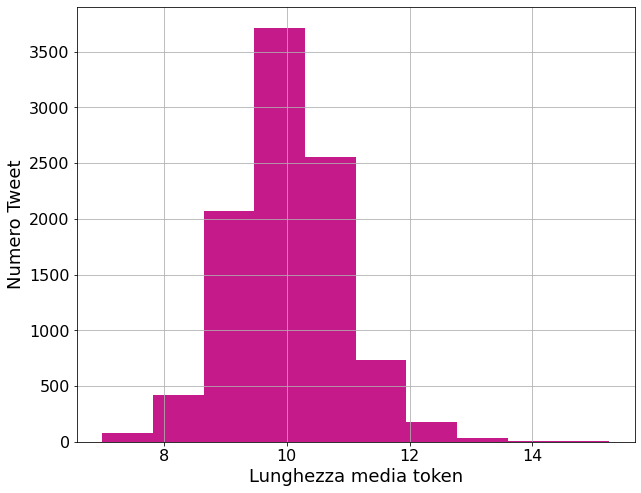

In [110]:
fig = plt.figure(figsize=(10, 8))
df['token_lunghezza_media'].hist(color = '#c51b8a')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Lunghezza media token', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/lunghezza_media_tokens.png")

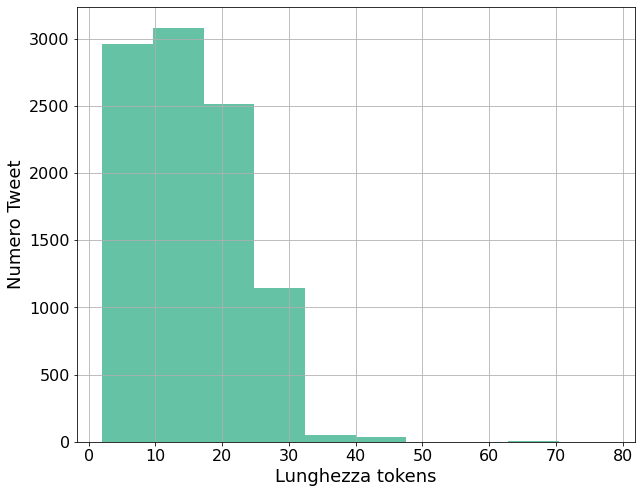

In [111]:
fig = plt.figure(figsize=(10, 8))
df['n_tok'].hist(color = '#66c2a4', bins = 10)
#df['token_lunghezza_media'].value_counts().plot(kind='hist', color = '#e7298a')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Lunghezza tokens', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/lunghezza_media_tokens_unici.png")

### Tokens più frequenti - FreqDist

In [219]:
tok = ''.join(df['tweet'].astype(str)).split()
tok


['immuni',
 'app',
 'contenere',
 'contagi',
 'covid',
 'fase',
 'versvalà',
 'piergianfranco',
 'lotta',
 'privacy',
 'chissà',
 'azioni',
 'riprovevoli',
 'potrebbe',
 'compiere',
 'governo',
 'tracciandoti',
 'app',
 'immuni',
 'altrimentiscaricate',
 'app',
 'immuni',
 'serve',
 'governo',
 'tracciarci',
 'controllarci',
 'sveglia',
 'gente',
 'abbasso',
 'dittaturadiegofusaro',
 'scusa',
 'attimo',
 'tieni',
 'così',
 'tanto',
 'privacy',
 'tralasciando',
 'fatto',
 'immuni',
 'molto',
 'sicura',
 'tante',
 'altre',
 'app',
 'punto',
 'vista',
 'ancora',
 'quiqualcuno',
 'adotti',
 'bambino',
 'appimmufinchè',
 'tampone',
 'sierologico',
 'scaricherò',
 'app',
 'immuni',
 'perchè',
 'app',
 'senza',
 'controlli',
 'tempestivi',
 'matita',
 'spuntata',
 'scrive',
 'quando',
 'parebene',
 'fortunatamente',
 'risolto',
 'problema',
 'principale',
 'app',
 'immuni',
 'vignette',
 'state',
 'corrette',
 'femministe',
 'soddisfatte',
 'però',
 'tempo',
 'battaglie',
 'finito',
 'sappiat

In [220]:
from nltk.probability import FreqDist
fdist = FreqDist(tok)
top_ten = fdist.most_common(20)

In [221]:
top_ten

[('app', 7437),
 ('immuni', 6992),
 ('covid', 1363),
 ('immuniapp', 1236),
 ('appimmuni', 1046),
 ('solo', 627),
 ('privacy', 548),
 ('fatto', 536),
 ('italia', 506),
 ('essere', 462),
 ('poi', 462),
 ('scaricare', 447),
 ('dati', 436),
 ('tracciamento', 419),
 ('cosa', 418),
 ('coronavirus', 396),
 ('fare', 393),
 ('stato', 379),
 ('scaricato', 375),
 ('senza', 361)]

In [222]:
freqdist = FreqDist(tok).most_common(10)
freqdistPlot = pd.Series(dict(top_ten))

In [223]:
freqdistPlot

app             7437
immuni          6992
covid           1363
immuniapp       1236
appimmuni       1046
solo             627
privacy          548
fatto            536
italia           506
essere           462
poi              462
scaricare        447
dati             436
tracciamento     419
cosa             418
coronavirus      396
fare             393
stato            379
scaricato        375
senza            361
dtype: int64

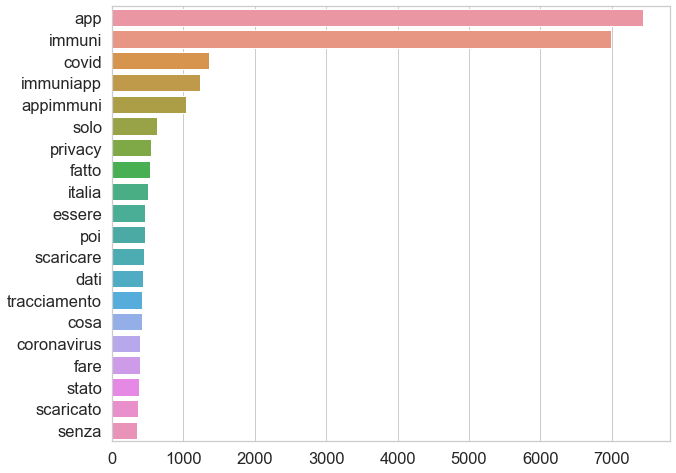

In [224]:
sns.barplot(x=freqdistPlot.values, y=freqdistPlot.index)
fig.savefig("img/tok_freq.png")

### Analisi POS

In [188]:
df["tweet_POS"] = pos_tag_sents(df["tweet"].astype(str).apply(word_tokenize))

In [189]:
df['tweet_POS']

0          [(immuni, JJ), (app, NN), (contenere, RB), (contagi, VBZ), (covid, JJ), (fase, NN), (vers, NNS)]
1       [(valà, NN), (piergianfranco, NN), (lotta, NN), (privacy, NN), (chissà, JJ), (azioni, NN), (ripr...
2       [(scaricate, NN), (app, NN), (immuni, JJ), (serve, NN), (governo, NN), (tracciarci, NN), (contro...
3       [(diegofusaro, NN), (scusa, NN), (attimo, NN), (tieni, NN), (così, NN), (tanto, IN), (privacy, N...
4                                             [(qualcuno, NN), (adotti, NNS), (bambino, NN), (appimmu, NN)]
                                                       ...                                                 
9779    [(giorgiameloni, JJ), (belpietrotweet, NN), (giusto, NN), (rendiamo, NN), (obbligatorio, NN), (u...
9780    [(update, JJ), (greenpass, NN), (zoneacolori, NNP), (restrizioni, VBZ), (lockdown, JJ), (testmol...
9781    [(bel, NN), (cashback, NN), (ogni, IN), (esibizione, NN), (scaricato, NN), (esclusivamente, NN),...
9782    [(dino, NN), (sbonac

In [190]:
pos = ''.join(df['tweet_POS'].astype(str)).split()
pos

["[('immuni',",
 "'JJ'),",
 "('app',",
 "'NN'),",
 "('contenere',",
 "'RB'),",
 "('contagi',",
 "'VBZ'),",
 "('covid',",
 "'JJ'),",
 "('fase',",
 "'NN'),",
 "('vers',",
 "'NNS')][('valà',",
 "'NN'),",
 "('piergianfranco',",
 "'NN'),",
 "('lotta',",
 "'NN'),",
 "('privacy',",
 "'NN'),",
 "('chissà',",
 "'JJ'),",
 "('azioni',",
 "'NN'),",
 "('riprovevoli',",
 "'NN'),",
 "('potrebbe',",
 "'NN'),",
 "('compiere',",
 "'RB'),",
 "('governo',",
 "'JJ'),",
 "('tracciandoti',",
 "'NN'),",
 "('app',",
 "'NN'),",
 "('immuni',",
 "'NN'),",
 "('altrimenti',",
 "'NN')][('scaricate',",
 "'NN'),",
 "('app',",
 "'NN'),",
 "('immuni',",
 "'JJ'),",
 "('serve',",
 "'NN'),",
 "('governo',",
 "'NN'),",
 "('tracciarci',",
 "'NN'),",
 "('controllarci',",
 "'NN'),",
 "('sveglia',",
 "'NN'),",
 "('gente',",
 "'NN'),",
 "('abbasso',",
 "'NN'),",
 "('dittatura',",
 "'NN')][('diegofusaro',",
 "'NN'),",
 "('scusa',",
 "'NN'),",
 "('attimo',",
 "'NN'),",
 "('tieni',",
 "'NN'),",
 "('così',",
 "'NN'),",
 "('tanto',",

In [191]:
df['POS_count'] = df['tweet_POS'].apply(lambda x: len(set(str(x).split())))

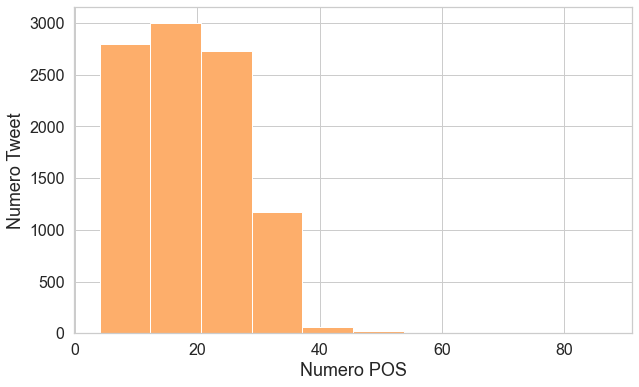

In [192]:
fig = plt.figure(figsize=(10, 6))
df['POS_count'].hist(color = '#fdae6b')
#df['token_lunghezza_media'].value_counts().plot(kind='hist', color = '#e7298a')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Numero POS', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/lunghezza_POS.png")

In [193]:
df['POS_lunghezza_media'] = df['tweet_POS'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

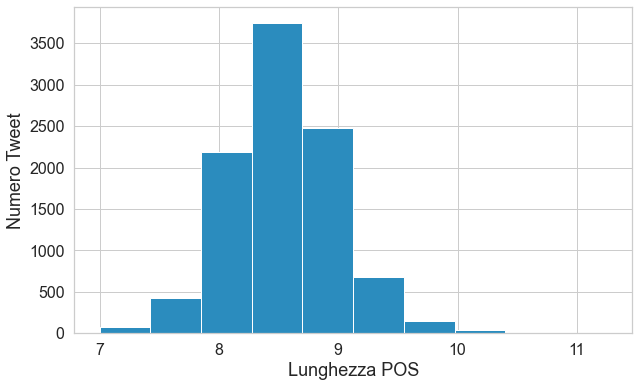

In [210]:
fig = plt.figure(figsize=(10, 6))
df['POS_lunghezza_media'].hist(color = '#2b8cbe')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Lunghezza POS', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/lunghezza_media_POS.png")

In [195]:
df.sort_values(by='POS_count', ascending=False)[['tweet', 'date', 'name', 'hashtags', 'POS_count']].head(n=10)

,tweet,date,name,hashtags,POS_count
2598,davide magno carloalberto ales luigi simonettacolt robertolocate netracerrob annaragosta fata tu...,2020-10-27,BartolomeoNicolotti🇪🇺🇮🇹🇫🇷🇺🇦,,87
2589,bartnicolotti mariamacina davide magno carloalberto ales luigi simonettacolt robertolocate netra...,2020-10-27,Tiziana,,81
2606,ales luigi simonettacolt robertolocate netracerrob annaragosta fata turch bulla adriano valeryme...,2020-10-27,BartolomeoNicolotti🇪🇺🇮🇹🇫🇷🇺🇦,coronawarnapp,77
1046,radiosilvana vedeleangela tullio cicerone giacominchio tlmugodzilla emanuel dogeviva ines fiero ...,2020-07-18,Romy,,71
2588,tiztweets mariamacina davide magno carloalberto ales luigi simonettacolt robertolocate netracerr...,2020-10-27,BartolomeoNicolotti🇪🇺🇮🇹🇫🇷🇺🇦,immuni,71
2416,gdt lockdown immuni app giuseppeconteit robersperanza paolapisano min ldraimondo cristinamucciol...,2020-10-18,maurizio marchetta,,53
137,silviasilvierba tizianarivale dcos nds oscurafenice tatiana orsa ivan zatarra biif chrishart imf...,2020-06-11,Roberto,,53
5637,colvieux billa immuni app ioitaliait ministerosalute mef gov innovazionegov istsupsan roberspera...,2021-06-19,Andrea Silenzi,,50
4537,lucaferrettievo opencovidm tbpc alfonsofuggetta carloalberto mar bru carbo marco miti vigliero i...,2021-03-21,Alessandro Wilcke,,50
4542,opencovidm sandrowilcke tbpc alfonsofuggetta carloalberto mar bru carbo marco miti vigliero immu...,2021-03-21,luca85,,49


In [196]:
print('Lunghezza media massima dei token', df['token_lunghezza_media'].max())
print('Lunghezza media minima dei token', df['token_lunghezza_media'].min())

Lunghezza media massima dei token 15.25
Lunghezza media minima dei token 7.0


---

### Analisi degli HASHTAGS

In [197]:
df['hashtags']

0                                                                                                          
1                                                                                                          
2                                                                                                          
3                                                                                                          
4                                                                                                appimmuni 
                                                       ...                                                 
9779                                                                    immuniapp contattostretto positivo 
9780     greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screening imm...
9781                                                              cashback greenpassobbligatorio immuniapp 
9782                        

### Pulizia hasht


In [198]:
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@ー'         # define a string of punctuation symbols

def pulizia_hasht(hashtag):
    hashtag = re.sub('[' + punctuation + ']+', ' ', hashtag)  # strip punctuation
    hashtag = re.sub('\s+', ' ', hashtag)  # remove double spacing
    hashtag = re.sub('([0-9]+)', '', hashtag)  # remove numbers
    #tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    #tweet = ' '.join(tweet_token_list)
    #tweet = tweet.strip(stop_words)
    return hashtag

In [199]:
df['hashtags'] = [pulizia_hasht(hashtag) for hashtag in df.hashtags]

In [200]:
hasht = ''.join(df['hashtags'].astype(str)).split()
hasht


['appimmuni',
 'immuni',
 'immuni',
 'digilosofia',
 'appimmuni',
 'lauraboldrini',
 'appimmuni',
 'femministe',
 'italia',
 'quarantena',
 'appimmuni',
 'immuni',
 'circozzi',
 'immuni',
 'lombardia',
 'coronavirus',
 'tinder',
 'immuni',
 'immuniapp',
 'appimmuni',
 'immuni',
 'notizie',
 'immuni',
 'app',
 'immuni',
 'app',
 'immuni',
 'immune',
 'app',
 'tecnologia',
 'bluetooth',
 'opensource',
 'welovecommunication',
 'immuniapp',
 'immuni',
 'contacttracing',
 'immuni',
 'cybersecurity',
 'appimmuni',
 'immuniapp',
 'pandemia',
 'sperimentazione',
 'immuni',
 'tracciamento',
 'contagio',
 'immuni',
 'abruzzo',
 'fisco',
 'lavoro',
 'previdenza',
 'diritto',
 'economia',
 'italia',
 'normativa',
 'notizie',
 'immuni',
 'appimmuni',
 'immuni',
 'blacklivesmattters',
 'app',
 'immuni',
 'modena',
 'coronavirus',
 'domani',
 'l',
 'immuni',
 'blacklivesmattters',
 'italia',
 'repubblica',
 'milano',
 'roma',
 'repubblicavergogna',
 'app',
 'immuni',
 'appstore',
 'ios',
 'android',


In [215]:
from nltk.probability import FreqDist
fdist = FreqDist(hasht)
top_ten = fdist.most_common(20)

In [216]:
top_ten

[('immuni', 1807),
 ('immuniapp', 1635),
 ('covid', 1475),
 ('appimmuni', 1406),
 ('coronavirus', 395),
 ('roma', 223),
 ('smartworking', 217),
 ('milano', 216),
 ('spallanzani', 216),
 ('stayathome', 213),
 ('lockdown', 185),
 ('app', 183),
 ('dpcm', 147),
 ('privacy', 136),
 ('greenpass', 129),
 ('coviditalia', 128),
 ('giugno', 113),
 ('contacttracing', 102),
 ('vaccino', 87),
 ('pfizer', 84)]

In [217]:
freqdistHasht = FreqDist(hasht).most_common(20)
freqdistPlotHasht = pd.Series(dict(freqdistHasht))

In [218]:
freqdistPlotHasht

immuni            1807
immuniapp         1635
covid             1475
appimmuni         1406
coronavirus        395
roma               223
smartworking       217
milano             216
spallanzani        216
stayathome         213
lockdown           185
app                183
dpcm               147
privacy            136
greenpass          129
coviditalia        128
giugno             113
contacttracing     102
vaccino             87
pfizer              84
dtype: int64

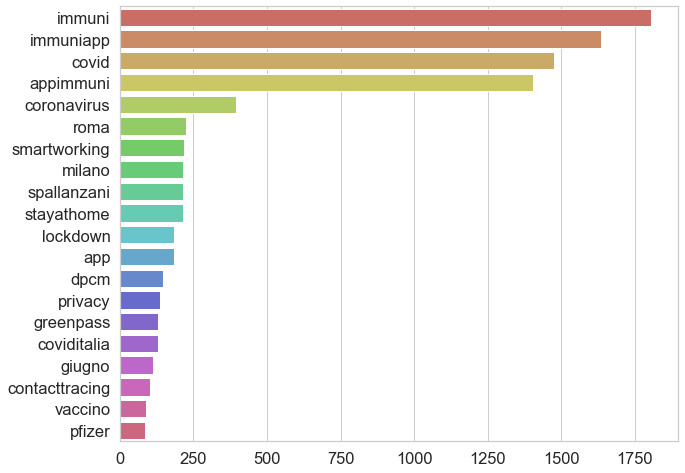

In [214]:
sns.color_palette("Set2")
all_plot = sns.barplot(x=freqdistPlotHasht.values, y=freqdistPlotHasht.index, palette = 'hls')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#fig, ax = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid", font_scale=1.5)

In [231]:
df.sort_values(by='hashtags', ascending=False)[['date','hashtags']].head(n=50)

,date,hashtags
2779,2020-11-08,zuccatelli
9771,2021-04-08,zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screening immuniapp vac...
3868,2021-01-25,zonarossa tracciamento tamponi
6097,2021-08-04,zonabianca greenpass immuni greenpass
2989,2020-11-11,zapping appimmuni
9126,2020-10-06,zanicchi boldi italia immuni immuniapp news privacy coronavirus pandemia covid coviditalia
9133,2020-10-06,zangrillo zarrillo covid immuniapp coronavirusitalia
8625,2020-06-16,zangrillo musumeci bertolaso regionesicilia immuniapp gimbe covid tamponi diagnostici vaccino a...
4649,2021-03-23,zaia zerocovidveneto aria immuni
9268,2020-10-14,zaia veneto immuniapp


In [158]:
len(hasht)

15267

In [159]:
df['hash_unique_count'] = df['hashtags'].apply(lambda x: len(set(str(x).split())))

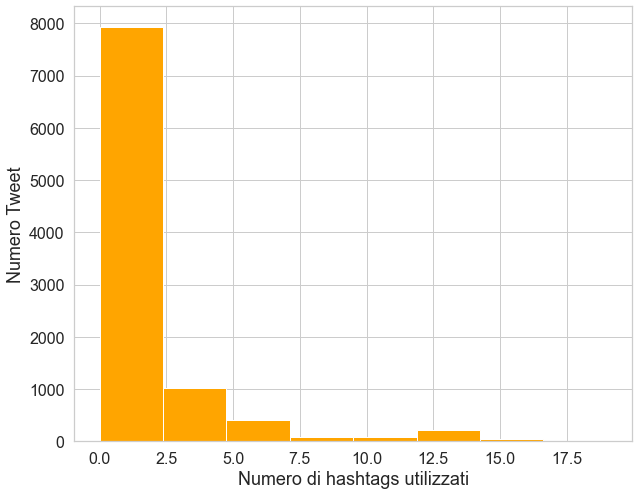

In [160]:
fig = plt.figure(figsize=(10, 8))
#plt.hist(x=d,, color='#0504aa',alpha=0.7, rwidth=0.85)
df['hash_unique_count'].hist(color = 'orange', bins=8)
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Numero di hashtags utilizzati', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/lunghezza_media_hasht_tweet.png")

In [161]:
df['hash_unique_count'].mean()

1.5037816843826657

In [162]:
df['hash_lunghezza_media'] = df['hashtags'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\Users\aliis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [163]:
df['hash_lunghezza_media'].mean()

8.335776983149943

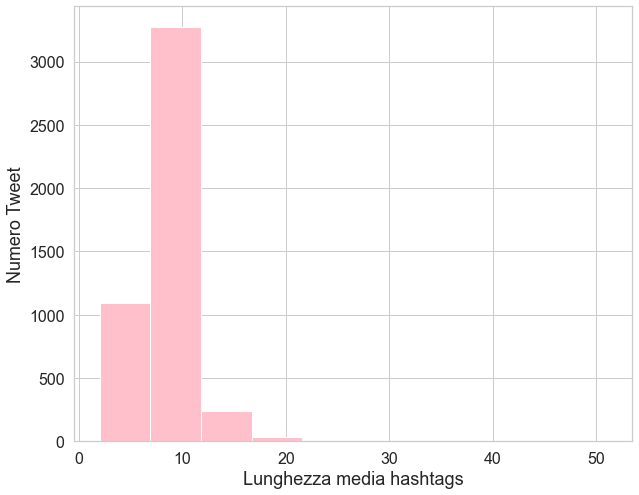

In [164]:
fig = plt.figure(figsize=(10, 8))
df['hash_lunghezza_media'].hist(color = 'pink')
plt.ylabel("Numero Tweet", fontsize=18)
plt.xlabel('Lunghezza media hashtags', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("img/lunghezza_media_hasht_tweet.png")

### Analisi temporale hashtags

In [165]:
df['hashtags'].groupby(pd.to_datetime(df['date']))

In [166]:
df['hashtags'].value_counts(ascending = True)

 statigenerali quarantene pianocolao commissionivarie appimmuni scuolaasettembre        1
 appimmuni ipocriti                                                                     1
 lacura appimmuni appinfetti negazionisti                                               1
 appimmuni privacy twitter                                                              1
 appimmuni esconodallefottutepareti                                                     1
                                                                                     ... 
 immuni immuniapp                                                                      99
 immuni                                                                               395
 appimmuni                                                                            411
 immuniapp                                                                            446
                                                                                     5142
Name: hash

In [167]:
df['hashtags'].sum()

'     appimmuni  immuni  immuni  digilosofia     appimmuni lauraboldrini  appimmuni femministe   italia quarantena appimmuni  immuni       circozzi    immuni lombardia coronavirus  tinder immuni immuniapp appimmuni    immuni   notizie   immuni app  immuni app  immuni immune app tecnologia bluetooth opensource welovecommunication  immuniapp immuni     contacttracing immuni cybersecurity appimmuni immuniapp pandemia      sperimentazione immuni tracciamento contagio   immuni abruzzo  fisco lavoro previdenza diritto economia italia normativa notizie  immuni appimmuni                immuni blacklivesmattters   app immuni modena   coronavirus domani l immuni  blacklivesmattters italia repubblica milano roma repubblicavergogna   app immuni appstore ios android iphone apple covid covid covid coronavirus contagio prevenzione cura care  app immuni stelle dati appimmuni immuniapp pandemiadelcoronavirus pandemiacoronavirus pandemiacoronavirus  immuni privacy  arsenalek  coronavirus immuni italiani

In [168]:
df.sort_values(by='date', ascending = True)[['date','hashtags']]

,date,hashtags
6902,2020-06-01,progress appimmuni
6914,2020-06-01,coronavirus appimmuni
6915,2020-06-01,immuniapp immuni coronavirus giugno appimmuni covid fase contacttracing contacttracingapp venta...
6916,2020-06-01,appimmuni coviditalia
6917,2020-06-01,immuni virus giugno appimmuni
...,...,...
6866,2021-11-29,
6881,2021-11-29,
6882,2021-11-29,variantesudafricana omicron
6865,2021-11-30,


In [169]:
from natsort import index_natsorted
df.sort_values(by="hashtags", key=lambda x: np.argsort(index_natsorted(df["date"])))[['date','hashtags']].tail(80)

,date,hashtags
6806,2021-11-20,
6807,2021-11-20,
6808,2021-11-20,immuni contevergognati banchirotelle
6810,2021-11-22,greenpass immuni novax
6811,2021-11-22,
...,...,...
6882,2021-11-29,variantesudafricana omicron
6883,2021-11-29,
6884,2021-11-29,
6865,2021-11-30,


In [170]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,hashtag_count,ment_count,token,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,,...,0,0,"[immuni, app, contenere, contagi, covid, fase, vers]",7,8.571429,"[(immuni, JJ), (app, NN), (contenere, RB), (contagi, VBZ), (covid, JJ), (fase, NN), (vers, NNS)]",12,7.928571,0,NaN
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azioni riprovevoli potrebbe compiere governo tracciando...,[],1,0,0,,...,0,0,"[valà, piergianfranco, lotta, privacy, chissà, azioni, riprovevoli, potrebbe, compiere, governo,...",14,10.714286,"[(valà, NN), (piergianfranco, NN), (lotta, NN), (privacy, NN), (chissà, JJ), (azioni, NN), (ripr...",18,8.857143,0,NaN
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,[],1,0,4,,...,0,0,"[scaricate, app, immuni, serve, governo, tracciarci, controllarci, sveglia, gente, abbasso, ditt...",11,10.363636,"[(scaricate, NN), (app, NN), (immuni, JJ), (serve, NN), (governo, NN), (tracciarci, NN), (contro...",14,8.681818,0,NaN
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto privacy tralasciando fatto immuni molto sicura tante a...,[],0,0,1,,...,0,1,"[diegofusaro, scusa, attimo, tieni, così, tanto, privacy, tralasciando, fatto, immuni, molto, si...",19,8.789474,"[(diegofusaro, NN), (scusa, NN), (attimo, NN), (tieni, NN), (così, NN), (tanto, IN), (privacy, N...",23,7.894737,0,NaN
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,appimmuni,...,1,0,"[qualcuno, adotti, bambino, appimmu]",4,10.250000,"[(qualcuno, NN), (adotti, NNS), (bambino, NN), (appimmu, NN)]",7,8.750000,1,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo obbligatorio uso immuniapp mezzi pubblici chiunque ...,"[{'screen_name': 'immuni_app', 'name': 'immuni app', 'id': '1283675098092797955'}]",0,0,0,immuniapp contattostretto positivo,...,3,3,"[giorgiameloni, belpietrotweet, giusto, rendiamo, obbligatorio, uso, immuniapp, mezzi, pubblici,...",22,10.590909,"[(giorgiameloni, JJ), (belpietrotweet, NN), (giusto, NN), (rendiamo, NN), (obbligatorio, NN), (u...",27,8.818182,3,10.666667
9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screen ...,[],0,0,0,greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screening imm...,...,15,0,"[update, greenpass, zoneacolori, restrizioni, lockdown, testmolecolari, testrapidi, tracciamento...",25,10.680000,"[(update, JJ), (greenpass, NN), (zoneacolori, NNP), (restrizioni, VBZ), (lockdown, JJ), (testmol...",34,8.900000,15,9.133333
9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusivamente immuniapp vogliamo mettere,[],1,0,0,cashback greenpassobbligatorio immuniapp,...,3,0,"[bel, cashback, ogni, esibizione, scaricato, esclusivamente, immuniapp, vogliamo, mettere]",9,11.111111,"[(bel, NN), (cashback, NN), (ogni, IN), (esibizione, NN), (scaricato, NN), (esclusivamente, NN),...",12,9.055556,3,12.666667
9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave son vaccinato breve seconda dose ritengo grosse b...,[],3,0,3,,...,0,2,"[dino, sbonaccini, vede, differenza, problema, grave, son, vaccinato, breve, seconda, dose, rite...",16,9.375000,"[(dino, NN), (sbonaccini, NN), (vede, NN), (differenza, NN), (problema, NN), (grave, VBP), (son,...",19,8.250000,0,NaN


In [171]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,hashtag_count,ment_count,token,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,,...,0,0,"[immuni, app, contenere, contagi, covid, fase, vers]",7,8.571429,"[(immuni, JJ), (app, NN), (contenere, RB), (contagi, VBZ), (covid, JJ), (fase, NN), (vers, NNS)]",12,7.928571,0,NaN
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azioni riprovevoli potrebbe compiere governo tracciando...,[],1,0,0,,...,0,0,"[valà, piergianfranco, lotta, privacy, chissà, azioni, riprovevoli, potrebbe, compiere, governo,...",14,10.714286,"[(valà, NN), (piergianfranco, NN), (lotta, NN), (privacy, NN), (chissà, JJ), (azioni, NN), (ripr...",18,8.857143,0,NaN
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,[],1,0,4,,...,0,0,"[scaricate, app, immuni, serve, governo, tracciarci, controllarci, sveglia, gente, abbasso, ditt...",11,10.363636,"[(scaricate, NN), (app, NN), (immuni, JJ), (serve, NN), (governo, NN), (tracciarci, NN), (contro...",14,8.681818,0,NaN
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto privacy tralasciando fatto immuni molto sicura tante a...,[],0,0,1,,...,0,1,"[diegofusaro, scusa, attimo, tieni, così, tanto, privacy, tralasciando, fatto, immuni, molto, si...",19,8.789474,"[(diegofusaro, NN), (scusa, NN), (attimo, NN), (tieni, NN), (così, NN), (tanto, IN), (privacy, N...",23,7.894737,0,NaN
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,appimmuni,...,1,0,"[qualcuno, adotti, bambino, appimmu]",4,10.250000,"[(qualcuno, NN), (adotti, NNS), (bambino, NN), (appimmu, NN)]",7,8.750000,1,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo obbligatorio uso immuniapp mezzi pubblici chiunque ...,"[{'screen_name': 'immuni_app', 'name': 'immuni app', 'id': '1283675098092797955'}]",0,0,0,immuniapp contattostretto positivo,...,3,3,"[giorgiameloni, belpietrotweet, giusto, rendiamo, obbligatorio, uso, immuniapp, mezzi, pubblici,...",22,10.590909,"[(giorgiameloni, JJ), (belpietrotweet, NN), (giusto, NN), (rendiamo, NN), (obbligatorio, NN), (u...",27,8.818182,3,10.666667
9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screen ...,[],0,0,0,greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screening imm...,...,15,0,"[update, greenpass, zoneacolori, restrizioni, lockdown, testmolecolari, testrapidi, tracciamento...",25,10.680000,"[(update, JJ), (greenpass, NN), (zoneacolori, NNP), (restrizioni, VBZ), (lockdown, JJ), (testmol...",34,8.900000,15,9.133333
9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusivamente immuniapp vogliamo mettere,[],1,0,0,cashback greenpassobbligatorio immuniapp,...,3,0,"[bel, cashback, ogni, esibizione, scaricato, esclusivamente, immuniapp, vogliamo, mettere]",9,11.111111,"[(bel, NN), (cashback, NN), (ogni, IN), (esibizione, NN), (scaricato, NN), (esclusivamente, NN),...",12,9.055556,3,12.666667
9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave son vaccinato breve seconda dose ritengo grosse b...,[],3,0,3,,...,0,2,"[dino, sbonaccini, vede, differenza, problema, grave, son, vaccinato, breve, seconda, dose, rite...",16,9.375000,"[(dino, NN), (sbonaccini, NN), (vede, NN), (differenza, NN), (problema, NN), (grave, VBP), (son,...",19,8.250000,0,NaN


In [172]:
df.sort_values(by='date', ascending = True)[['tweet', 'date', 'name', 'hashtags']].head(n=10)

,tweet,date,name,hashtags
6902,ecco seconda parte progress altri esperti spiegano appimmuni,2020-06-01,Isabella Milani,progress appimmuni
6914,coronavirus appimmuni online,2020-06-01,Agenzia Nova,coronavirus appimmuni
6915,immuniapp finalmente pronta app immuni servirà verificare qualcuno ancora vivo ricordo coronavir...,2020-06-01,Gianluca S.,immuniapp immuni coronavirus giugno appimmuni covid fase contacttracing contacttracingapp venta...
6916,buon senso senso civico appimmuni coviditalia,2020-06-01,NeverSayJes,appimmuni coviditalia
6917,finalmente pronta app immuni servirà verificare qualcuno ancora vivo ricordo virus mario bovina ...,2020-06-01,Prugna,immuni virus giugno appimmuni
6918,app immuni disponibile download parte giorno regioni liguria puglia abruzzo marche poi verrà coi...,2020-06-01,L'Altra Opinione,immuni liguria puglia abruzzo marche appimmuni fase
6919,appimmuni arrivata,2020-06-01,Ramasse'...io e basta....,appimmuni
6920,app immuni ora disponibile play store android app store iphone appimmuni app,2020-06-01,GiardiniBlog,immuni android iphone appimmuni app
6921,ricordate oggi esistono decine multinazionali vivono solo dati personali gusti spostamenti perso...,2020-06-01,Run Man ♻️,appimmuni immuniapp immuni covid
6922,scaricherò appimmuni vedo serietà capo stato opposizione dando peggio parte carlocalenda sabato ...,2020-06-01,Paolo Fornasari 🇪🇺🇮🇹 🇺🇦,appimmuni giugno ottoemezzo


## Dispersione Lessicale

In [173]:
freq_w = ['immuni', 'covid', 'immuniapp', 'appimmuni', 'privacy', 'dati', 'greenpass', 'vaccini'] 
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@' 


def trova_freq(x):
    list_w = x.split(' ')
    out_data = []
    for word in list_w:
        word = word.lower()
        if word.strip(punctuation) in freq_w:
            return word.strip(punctuation)
        else:
            pass
        
df['word_f'] = df['tweet'].apply(trova_freq) 
df.word_f.value_counts()

immuni       6471
appimmuni    1026
immuniapp     889
covid         556
privacy       144
dati          136
greenpass     112
vaccini        51
Name: word_f, dtype: int64

In [174]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,ment_count,token,n_tok,token_lunghezza_media,tweet_POS,POS_count,POS_lunghezza_media,hash_unique_count,hash_lunghezza_media,word_f
0,2020-06-04,266910319,appleforyou83,Theappleforyou,immuni app contenere contagi covid fase vers,[],0,0,0,,...,0,"[immuni, app, contenere, contagi, covid, fase, vers]",7,8.571429,"[(immuni, JJ), (app, NN), (contenere, RB), (contagi, VBZ), (covid, JJ), (fase, NN), (vers, NNS)]",12,7.928571,0,NaN,immuni
1,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,valà piergianfranco lotta privacy chissà azioni riprovevoli potrebbe compiere governo tracciando...,[],1,0,0,,...,0,"[valà, piergianfranco, lotta, privacy, chissà, azioni, riprovevoli, potrebbe, compiere, governo,...",14,10.714286,"[(valà, NN), (piergianfranco, NN), (lotta, NN), (privacy, NN), (chissà, JJ), (azioni, NN), (ripr...",18,8.857143,0,NaN,privacy
2,2020-06-04,1092893394,annafornasetti,안나 ★彡𓂀🫒,scaricate app immuni serve governo tracciarci controllarci sveglia gente abbasso dittatura,[],1,0,4,,...,0,"[scaricate, app, immuni, serve, governo, tracciarci, controllarci, sveglia, gente, abbasso, ditt...",11,10.363636,"[(scaricate, NN), (app, NN), (immuni, JJ), (serve, NN), (governo, NN), (tracciarci, NN), (contro...",14,8.681818,0,NaN,immuni
3,2020-06-04,1267957495324172288,aleessi4m,alessia ✨,diegofusaro scusa attimo tieni così tanto privacy tralasciando fatto immuni molto sicura tante a...,[],0,0,1,,...,1,"[diegofusaro, scusa, attimo, tieni, così, tanto, privacy, tralasciando, fatto, immuni, molto, si...",19,8.789474,"[(diegofusaro, NN), (scusa, NN), (attimo, NN), (tieni, NN), (così, NN), (tanto, IN), (privacy, N...",23,7.894737,0,NaN,privacy
4,2020-06-04,1337280565,garboek,GabryKeegan,qualcuno adotti bambino appimmu,[],0,0,2,appimmuni,...,0,"[qualcuno, adotti, bambino, appimmu]",4,10.250000,"[(qualcuno, NN), (adotti, NNS), (bambino, NN), (appimmu, NN)]",7,8.750000,1,9.000000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,giorgiameloni belpietrotweet giusto rendiamo obbligatorio uso immuniapp mezzi pubblici chiunque ...,"[{'screen_name': 'immuni_app', 'name': 'immuni app', 'id': '1283675098092797955'}]",0,0,0,immuniapp contattostretto positivo,...,3,"[giorgiameloni, belpietrotweet, giusto, rendiamo, obbligatorio, uso, immuniapp, mezzi, pubblici,...",22,10.590909,"[(giorgiameloni, JJ), (belpietrotweet, NN), (giusto, NN), (rendiamo, NN), (obbligatorio, NN), (u...",27,8.818182,3,10.666667,immuniapp
9780,2021-07-16,1035920142843215874,capobianco2005c,Michele Capobianco,update greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screen ...,[],0,0,0,greenpass zoneacolori restrizioni lockdown testmolecolari testrapidi tracciamento screening imm...,...,0,"[update, greenpass, zoneacolori, restrizioni, lockdown, testmolecolari, testrapidi, tracciamento...",25,10.680000,"[(update, JJ), (greenpass, NN), (zoneacolori, NNP), (restrizioni, VBZ), (lockdown, JJ), (testmol...",34,8.900000,15,9.133333,greenpass
9781,2021-08-08,1006624848272154624,grossofanken,grossofanken,bel cashback ogni esibizione scaricato esclusivamente immuniapp vogliamo mettere,[],1,0,0,cashback greenpassobbligatorio immuniapp,...,0,"[bel, cashback, ogni, esibizione, scaricato, esclusivamente, immuniapp, vogliamo, mettere]",9,11.111111,"[(bel, NN), (cashback, NN), (ogni, IN), (esibizione, NN), (scaricato, NN), (esclusivamente, NN),...",12,9.055556,3,12.666667,immuniapp
9782,2021-08-29,1260497008986652678,lorech__,Lore,dino sbonaccini vede differenza problema grave son vaccinato breve seconda dose ritengo grosse b...,[],3,0,3,,...,2,"[dino, sbonaccini, vede, differenza, problema, grave, son, vaccinato, breve, seconda, dose, rite...",16,9.375000,"[(dino, NN), (sbonaccini, NN), (vede, NN), (differenza, NN), (problema, NN), (grave, VBP), (son,...",19,8.250000,0

In [175]:
df['date'] = pd.to_datetime(df['date'])

## Analisi unigrammi, Bigrammi, trigrammi

In [177]:
stopword = nltk.corpus.stopwords.words('italian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stopword]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrammi (1 parola)
df_unigrams = defaultdict(int)
for tweet in df['tweet']:
    for word in generate_ngrams(tweet):
        df_unigrams[word] += 1
        
df_unigrams = pd.DataFrame(sorted(df_unigrams.items(), key=lambda x: x[1])[::-1])

# 2 (parole)
df_bigrams = defaultdict(int)

for tweet in df['tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        df_bigrams[word] += 1
        
df_bigrams = pd.DataFrame(sorted(df_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrammi
df_trigrams = defaultdict(int)

for tweet in df['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        df_trigrams[word] += 1

df_trigrams = pd.DataFrame(sorted(df_trigrams.items(), key=lambda x: x[1])[::-1])


UNIGRAMMI PIù COMUNI

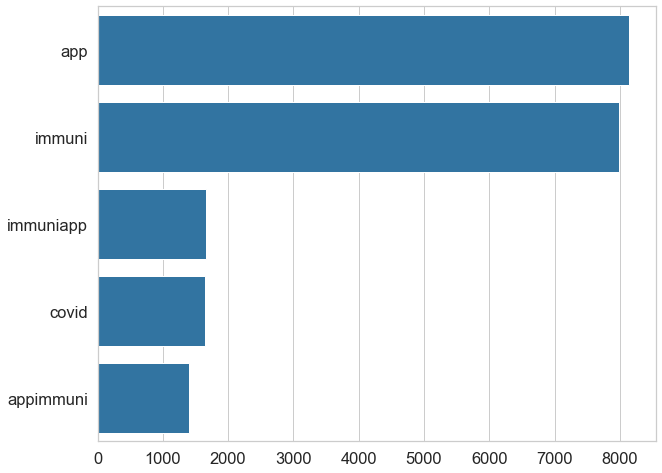

In [232]:
sns.barplot(y=df_unigrams[0].values[:5], x=df_unigrams[1].values[:5], color='#1f78b4')

plt.savefig('img/unigrammi_df_finale.jpg')
plt.show()

#33a02c
#fb9a99
#e31a1c

Bigrammi più comuni

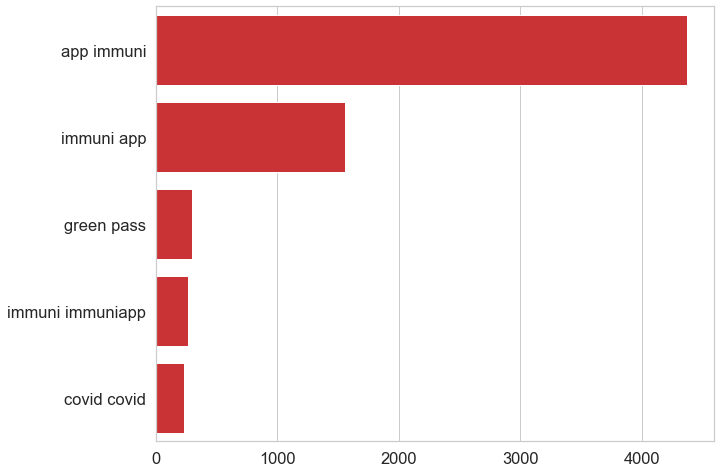

In [233]:
plt.figsize=(25, 15)
sns.barplot(y=df_bigrams[0].values[:5], x=df_bigrams[1].values[:5], color='#e31a1c')
plt.savefig('img/bigrammi_df_finale.jpg')
plt.show()

Trigrammi più comuni

C:\Users\aliis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aliis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


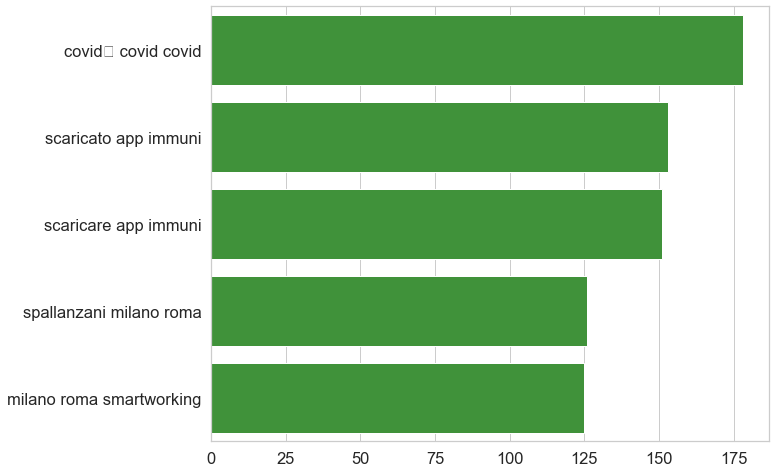

In [234]:
plt.figsize=(25, 15)
sns.barplot(y=df_trigrams[0].values[:5], x=df_trigrams[1].values[:5], color='#33a02c')
plt.savefig('img/trigrammi_df_finale.jpg')
plt.show()

----

Salvo il df

In [181]:
df.to_csv('dati/df_finale_2020_2021_nltk_analysis.csv')